In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [1]:
import seml

In [16]:
%cd ../..

/nfs/homedirs/fuchsgru/MastersThesis


In [17]:
from model_registry import ModelRegistry
from confif

In [18]:
registry = ModelRegistry()

In [34]:
all_cfgs = [c for c, _ in registry.items()]

In [35]:
cfgs_wtemp = [c for c in all_cfgs if c.training.temperature_scaling is not None]

In [36]:
len(cfgs_wtemp), len(all_cfgs)

(707, 11340)

In [38]:
query = {
    'config.training.temperature_scaling' : {'$ne' : None}
}
docs = [d for d in registry.database.get_collection(registry.collection_name).find(query)]

In [39]:
len(docs)

0

In [40]:
res = registry.database.get_collection(registry.collection_name).delete_many(query)
res.deleted_count

1

In [30]:
from tqdm import tqdm

In [31]:
for cfg in tqdm(cfgs_wtemp):
    registry.remove(cfg)

  0%|          | 2/709 [00:14<1:24:41,  7.19s/it]


KeyboardInterrupt: 

In [41]:
collection = seml.database.get_collection('week26_gcn_all')

In [42]:
deleted = collection.delete_many({'config.model.reconstruction.loss_weight' : 1.0})

In [45]:
deleted.deleted_count

180

In [4]:
docs = []
for doc in collection.find({'config.model.reconstruction.loss_weight' : 1.0}):
    docs.append(doc)

In [13]:
x = collection.update_many(
    {'config.model.reconstruction.loss_weight' : 1.0},
    {'$set' : {'status' : 'STAGED', 'config.run.use_pretrained_model' : False, 'result' : None}},
)

In [12]:
x.modified_count

180

In [15]:
import torch

torch.load('/nfs/students/fuchsgru/model_registry/-6686146258442537729-1651062568-2858956-3837753607.ckpt')

{'epoch': 1,
 'global_step': 1,
 'pytorch-lightning_version': '1.5.10',
 'state_dict': OrderedDict([('temperature', tensor([-40.1117])),
              ('backbone.convs.0.conv.bias',
               tensor([ 1.0225e-01,  1.6238e-01, -8.7518e-05,  2.4644e-01,  1.3148e-01,
                        2.1629e-01,  1.3193e-01,  2.1415e-01,  1.3036e-01,  1.1249e-01,
                        2.1331e-01,  1.3018e-01,  1.0558e-01,  1.8947e-01,  1.7584e-01,
                        1.5559e-01,  1.4790e-01,  2.0596e-01,  1.3945e-01,  1.0289e-01,
                        1.8747e-01,  1.2813e-01,  1.2226e-01,  1.5949e-01,  1.5595e-01,
                        1.6406e-01,  1.6546e-01,  1.3846e-01,  9.3164e-02,  1.4640e-01,
                        1.5455e-01,  1.6782e-01,  2.0669e-01,  3.3237e-01,  1.2857e-01,
                        1.2483e-01,  2.6981e-01,  1.6286e-01,  2.3548e-01, -2.7457e-05,
                        1.5859e-01,  2.1396e-01,  2.2138e-01,  1.6352e-01,  2.1302e-01,
                       -4.

In [2]:
%cd ../..

/nfs/homedirs/fuchsgru/MastersThesis


In [47]:
from dataset_registry import DatasetRegistry
from model_registry import ModelRegistry

In [5]:
import data.constants as dc

In [4]:
reg = DatasetRegistry()

In [48]:
mreg = ModelRegistry()

In [51]:
to_remove_m = []
for cfg, path in mreg.items():
    print(cfg.data.dataset)
    if cfg.data.dataset == dc.COAUTHOR_CS:
        to_remove_m.append(cfg)

cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full


cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full


amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo

amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo

citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
citeseer
c

cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full


amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
citeseer
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
amazon_photo
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
cora_full
c

amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
cora_full
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
cora_full
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazon_photo
amazo

In [50]:
len(to_remove_m)

0

In [42]:
to_remove = []

for (cfg, seed), path in reg.items():
    if cfg.dataset == dc.COAUTHOR_CS:
        to_remove.append((cfg, seed))

In [44]:
for cfg, seed in to_remove:
    print(reg.remove((cfg, seed)))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [25]:
import seml
from collections import defaultdict

In [26]:
collection = seml.database.get_collection('week26_gcn_all')
by_status = defaultdict(set)
for r in collection.find():
    by_status[r['status']].add(r['config']['data']['dataset'])

In [27]:
by_status

defaultdict(set,
            {'COMPLETED': {'amazon_photo', 'citeseer', 'cora_full', 'pubmed'},
             'PENDING': {'amazon_photo', 'pubmed'},
             'FAILED': {'coauthor_cs'},
             'RUNNING': {'pubmed'}})

In [11]:
import torch
coauthor = torch.load('/nfs/students/fuchsgru/dataset_registry/893499538.pt')

In [17]:
data_dict, _ = coauthor

In [32]:
from torch_geometric.data import DataLoader, Data

In [21]:
train_loader = DataLoader(data_dict[dc.TRAIN])

/nfs/homedirs/fuchsgru/miniconda3/lib/python3.9/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [29]:
graph = data_dict[dc.TRAIN][0]
graph.x.size()

torch.Size([18333, 6805])

In [41]:
graph.vertex_to_idx

{'0006BF12': 0,
 '0007426B': 1,
 '0009F1CA': 2,
 '000B765A': 3,
 '000C2DD3': 4,
 '000F5B26': 5,
 '000FB620': 6,
 '0014662E': 7,
 '00151935': 8,
 '0018F17C': 9,
 '00198139': 10,
 '001A80DB': 11,
 '001C065F': 12,
 '001D74E7': 13,
 '001DC759': 14,
 '001EEACB': 15,
 '001F472E': 16,
 '00238A9E': 17,
 '00238F53': 18,
 '00256BD3': 19,
 '00262770': 20,
 '00278389': 21,
 '0029A3E8': 22,
 '002C2840': 23,
 '002D2953': 24,
 '002D670D': 25,
 '002FDBBD': 26,
 '0034C25B': 27,
 '0035658E': 28,
 '0039C5A5': 29,
 '0046FB49': 30,
 '004EA490': 31,
 '004F4841': 32,
 '0050777E': 33,
 '0055CF35': 34,
 '005621C4': 35,
 '0058B56C': 36,
 '005962D1': 37,
 '005B97E8': 38,
 '005C4159': 39,
 '005D4952': 40,
 '005F5C4C': 41,
 '006020B1': 42,
 '006E6056': 43,
 '00710F54': 44,
 '00721344': 45,
 '0072B820': 46,
 '00768F35': 47,
 '007C16E9': 48,
 '0080E340': 49,
 '00862132': 50,
 '0086F4F9': 51,
 '008C3772': 52,
 '008E15C5': 53,
 '008ED8BD': 54,
 '00916C71': 55,
 '0094F2AD': 56,
 '00986B65': 57,
 '00A13033': 58,
 '00A8C

In [40]:
from data.base import SingleGraphDataset

data = Data(x=graph.x, y=graph.y, edge_index=graph.edge_index, mask=graph.mask, vertex_to_idx=graph.vertex_to_idx,
               label_to_idx=graph.label_to_idx)
dataset = SingleGraphDataset(data)

for batch in DataLoader(dataset):
    print('success')



success


In [38]:
graph

Data(
  x=[18333, 6805],
  edge_index=[2, 163788],
  y=[18333],
  mask=[18333],
  vertex_to_idx={
    0006BF12=0,
    0007426B=1,
    0009F1CA=2,
    000B765A=3,
    000C2DD3=4,
    000F5B26=5,
    000FB620=6,
    0014662E=7,
    00151935=8,
    0018F17C=9,
    00198139=10,
    001A80DB=11,
    001C065F=12,
    001D74E7=13,
    001DC759=14,
    001EEACB=15,
    001F472E=16,
    00238A9E=17,
    00238F53=18,
    00256BD3=19,
    00262770=20,
    00278389=21,
    0029A3E8=22,
    002C2840=23,
    002D2953=24,
    002D670D=25,
    002FDBBD=26,
    0034C25B=27,
    0035658E=28,
    0039C5A5=29,
    0046FB49=30,
    004EA490=31,
    004F4841=32,
    0050777E=33,
    0055CF35=34,
    005621C4=35,
    0058B56C=36,
    005962D1=37,
    005B97E8=38,
    005C4159=39,
    005D4952=40,
    005F5C4C=41,
    006020B1=42,
    006E6056=43,
    00710F54=44,
    00721344=45,
    0072B820=46,
    00768F35=47,
    007C16E9=48,
    0080E340=49,
    00862132=50,
    0086F4F9=51,
    008C3772=52,
    008E15C

In [22]:
for batch in train_loader:
    print()

AttributeError: 'int' object has no attribute 'max'

[0.         0.         0.28827157 0.35454161 0.45095863 0.54996559
 0.65321984 0.74614355 0.84519393 0.        ]


(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

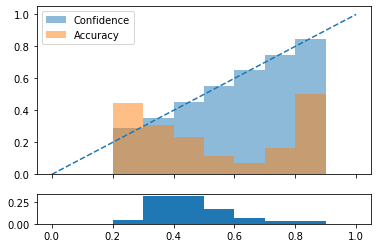

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from util import calibration_curve

def plot_calibration(probs, y_true, bins=10, eps=1e-12):
    """ Calculates the calibration curve for predictions.
    
    Parameters:
    -----------
    probs : torch.Tensor, shape [n, num_classes]
        Predicted probabilities.
    y_true : torch.Tensor, shape [n]
        True class labels.
    bins : int
        The number of bins to use.
    eps : float 
        Epsilon to prevent division by zero.
    
    Returns:
    --------
    fig : plt.Figure
        The figure plotted.
    ax : plt.Axes
        The axes of the figure.
    """
    
    edges, bin_conf, bin_acc, bin_density = calibration_curve(probs, y_true, bins=bins, eps=eps)
    widths = edges[1:] - edges[:-1]
    centers = 0.5 * (edges[1:] + edges[:-1])
    print(bin_conf)
    
    fig, axs = plt.subplots(2, 1, sharex=True, squeeze=False, gridspec_kw = {
            'height_ratios' : [0.85, 0.15],
    })
    ax = axs[0, 0]
    ax.plot([0, 1], [0, 1], ls='--')
    ax.bar(centers, bin_conf, widths, label='Confidence', alpha=0.5)
    ax.bar(centers, bin_acc, widths, label='Accuracy', alpha = 0.5)
    ax.legend()
    
    axs[1, 0].bar(centers, bin_density, widths, label='Density')
    
    return fig, ax

probs = np.random.randn(200, 5)
from scipy.special import softmax
scores = softmax(probs, axis=1)
y_true = np.random.randint(probs.shape[1], size=(probs.shape[0]))
import torch
plot_calibration(torch.from_numpy(scores), torch.from_numpy(y_true))

In [44]:
svs = np.random.randn(*[509, 64])

(0.0, 63.0)

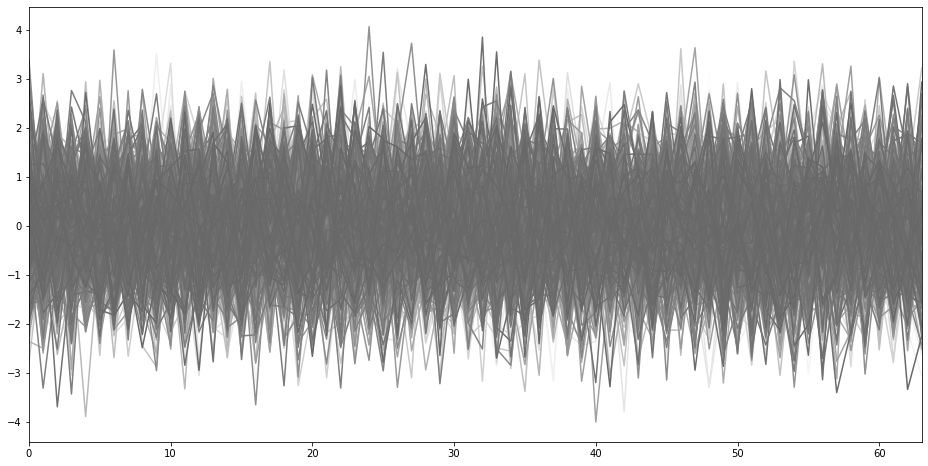

In [77]:
fig, ax = plt.subplots(figsize=(16, 8))
colors = np.linspace(1.0, 0.1, svs.shape[0])
for idx, magnitude in enumerate(colors):
    plt.plot(np.arange(svs.shape[1]), svs[idx], c=np.ones(3) * np.exp(magnitude - 1))
ax.set_xlim(0, svs.shape[1] - 1)

<AxesSubplot:xlabel='Epoch', ylabel='Singular Value'>

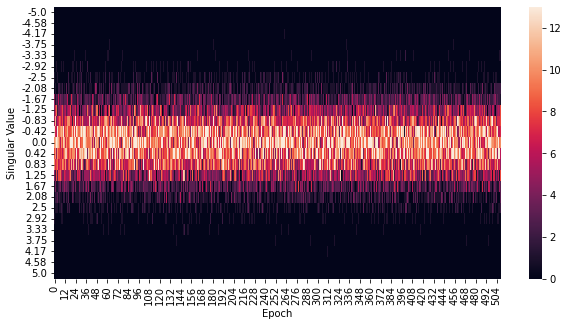

In [56]:
fig, ax = plt.subplots(figsize=(10, 5))
num_bins = 25
bin_centers = np.linspace(np.round(svs.min() - 0.5, 0), np.round(svs.max() + 0.5, 0), num_bins)

distances = np.abs(svs.flatten()[:, None] - bin_centers[None, :])
bin_idxs = distances.argmin(1).reshape(svs.shape)

counts = np.zeros((num_bins, svs.shape[0]))
for epoch in range(svs.shape[0]):
    for bin_idx in bin_idxs[epoch]:
        counts[bin_idx, epoch] += 1

counts = pd.DataFrame(counts, index=np.round(bin_centers, 2))
counts.index.name = 'Singular Value'
counts.columns.name = 'Epoch'

sns.heatmap(counts, robust=True, ax=ax)

In [47]:
counts

,0,1,2,3,4,5,6,7,8,9,...,499,500,501,502,503,504,505,506,507,508
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0,2.0,1.0,2.0,1.0,1.0,2.0,...,0.0,0.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
8,5.0,1.0,3.0,2.0,6.0,1.0,2.0,4.0,3.0,3.0,...,2.0,3.0,3.0,4.0,5.0,2.0,3.0,2.0,2.0,1.0
9,4.0,7.0,9.0,2.0,4.0,9.0,4.0,5.0,6.0,8.0,...,6.0,6.0,8.0,2.0,0.0,4.0,5.0,6.0,5.0,8.0


In [10]:

bin_width = bin_centers[1] - bin_centers[0]
bin_edges = np.array([bin_centers[0] - bin_width / 2] + list(bin_centers + bin_width / 2))
None
bin_centers, bin_edges

0.2

In [41]:
counts

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [61]:
type(ax)

matplotlib.axes._subplots.AxesSubplot